<a href="https://colab.research.google.com/github/Naidala/R_DataAnalysis/blob/main/UnemploymentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparation
Monthly unemployment rates were aggregated into annual averages to reduce noise. We then compare unemployment between:
- women of different races (black, white, hispanic)
- people with different education (less than High School vs more than Master's Degree) accross the three races
- black women vs black men

In [ ]:
library(lubridate)

# TO ACCESS A DATAFRAME:
# use $ when you access by string name of the column;
# use [[]] if you use a variable with the name allocated
create_plot <- function(data_csv, value_col, this_color, line_type=1, this_pch=19) {
  # compute mean and std dev by year
  dates <- format(as.Date(csv$date), "%Y")                  # extract year as a string
  stats_by_year <- aggregate(
    data_csv[[value_col]],
    by = list(Year = dates),
    FUN = function(x) c(mean = mean(x), std = sd(x))
  )

  stats_by_year <- do.call(data.frame, stats_by_year)       # Convert to a clean dataframe
  colnames(stats_by_year) <- c("Year", "Mean", "StdDev")    # rename columns
  stats_by_year$Year <- as.numeric(stats_by_year$Year)      # convert string to number

  # line plot of mean accross years
  lines(
    stats_by_year$Year, stats_by_year$Mean,
    type='b', pch = this_pch, col = this_color, lty=line_type
  )

  # # add std dev bars around each mean value
  # arrows(
  #   stats_by_year$Year, stats_by_year$Mean - stats_by_year$StdDev,
  #   stats_by_year$Year, stats_by_year$Mean + stats_by_year$StdDev,
  #   length = 0.05, angle = 90, code = 3, col = this_color
  # )
}

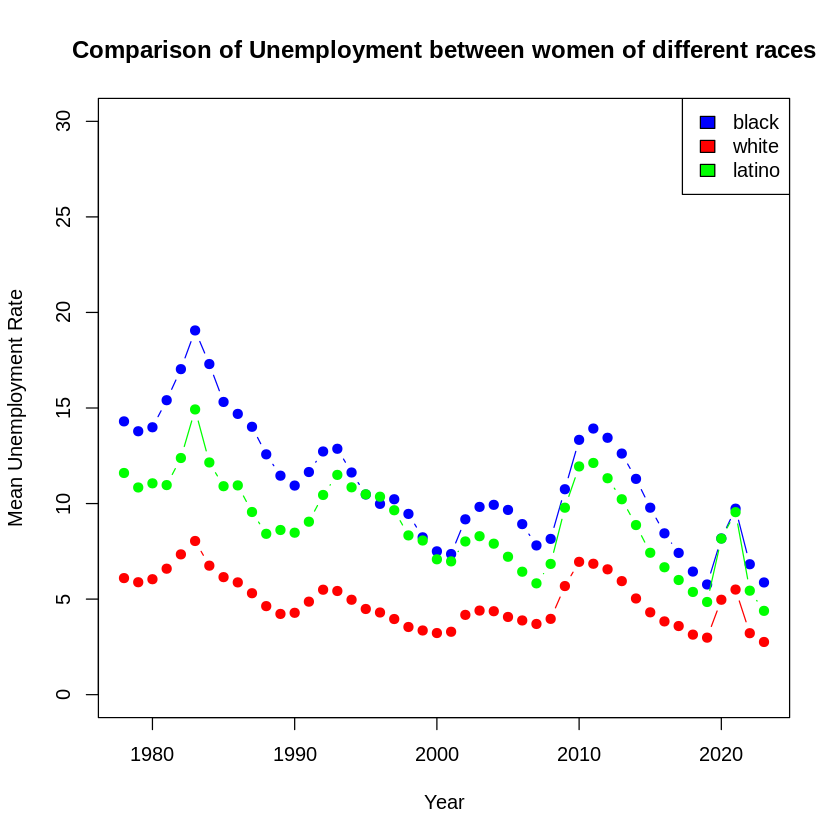

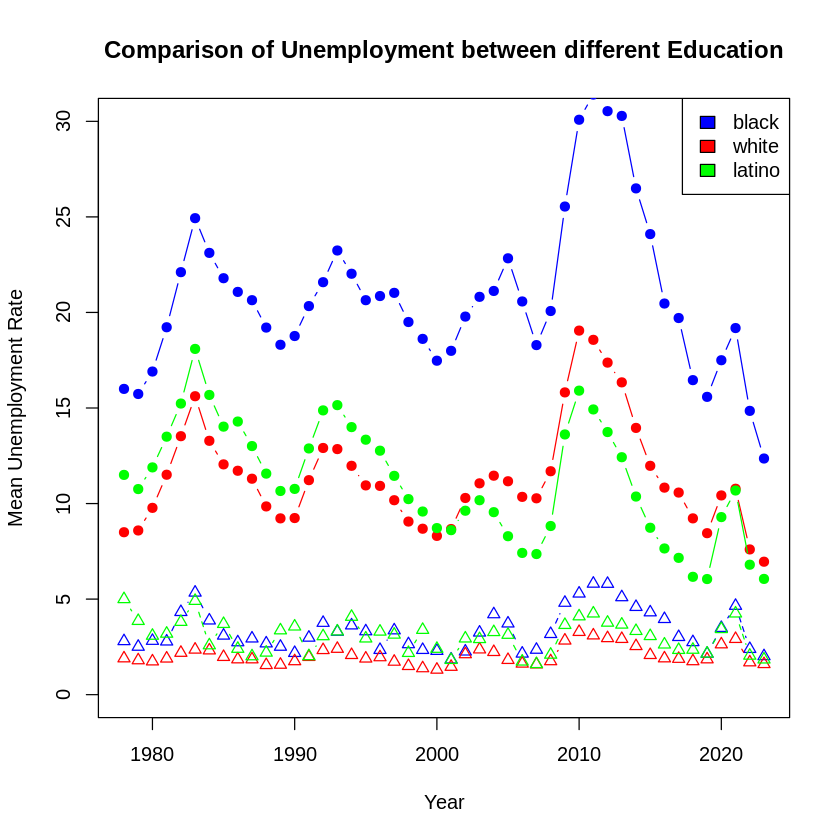

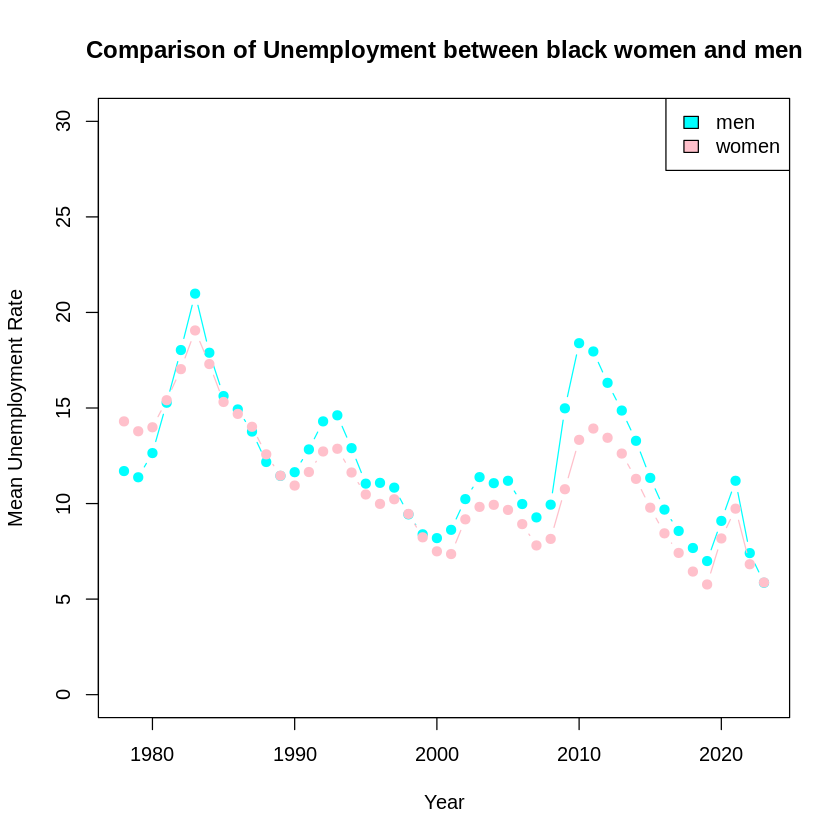

In [ ]:
csv <- read.csv('./unemployed.csv')
###
plot(1, type = "n", xlim = range(as.numeric(format(as.Date(csv$date), "%Y"))), ylim = c(0,30),
     xlab = "Year", ylab = "Mean Unemployment Rate", main = "Comparison of Unemployment between women of different races")
create_plot(csv, "black_women", "blue")
create_plot(csv, "white_women", "red")
create_plot(csv, "hispanic_women", "green")
legend("topright", legend=c('black','white','latino'), fill=c('blue','red','green'))
###
plot(2, type = "n", xlim = range(as.numeric(format(as.Date(csv$date), "%Y"))), ylim = c(0,30),
     xlab = "Year", ylab = "Mean Unemployment Rate", main = "Comparison of Unemployment between different Education")
create_plot(csv, "black_less_than_hs", "blue")
create_plot(csv, "black_advanced_degree", "blue", 2, 24)
create_plot(csv, "white_less_than_hs", "red")
create_plot(csv, "white_advanced_degree", "red", 2, 24)
create_plot(csv, "hispanic_less_than_hs", "green")
create_plot(csv, "hispanic_advanced_degree", "green", 2, 24)
legend("topright", legend=c('black','white','latino'), fill=c('blue','red','green'))
###
plot(3, type = "n", xlim = range(as.numeric(format(as.Date(csv$date), "%Y"))), ylim = c(0,30),
     xlab = "Year", ylab = "Mean Unemployment Rate", main = "Comparison of Unemployment between black women and men")
create_plot(csv, "black_men", "cyan")
create_plot(csv, "black_women", "pink")
legend("topright", legend=c('men','women'), fill=c('cyan','pink'))

## Quartile Analysis
- **Black women:** Higher interquartile range (8.7%–13.3%), indicating more variability in unemployment rates.
- **White women:** Lowest range (3.8%–5.9%), reflecting more stable employment conditions.
- **Hispanic women:** Moderate variability (7.2%–10.9%), closer to Black women than White women.

[1] "black women quartiles"
   25%    50%    75% 
 8.675 10.600 13.300 
[1] "white women quartiles"
25% 50% 75% 
3.8 4.5 5.9 
[1] "hispanic women quartiles"
 25%  50%  75% 
 7.2  8.8 10.9 


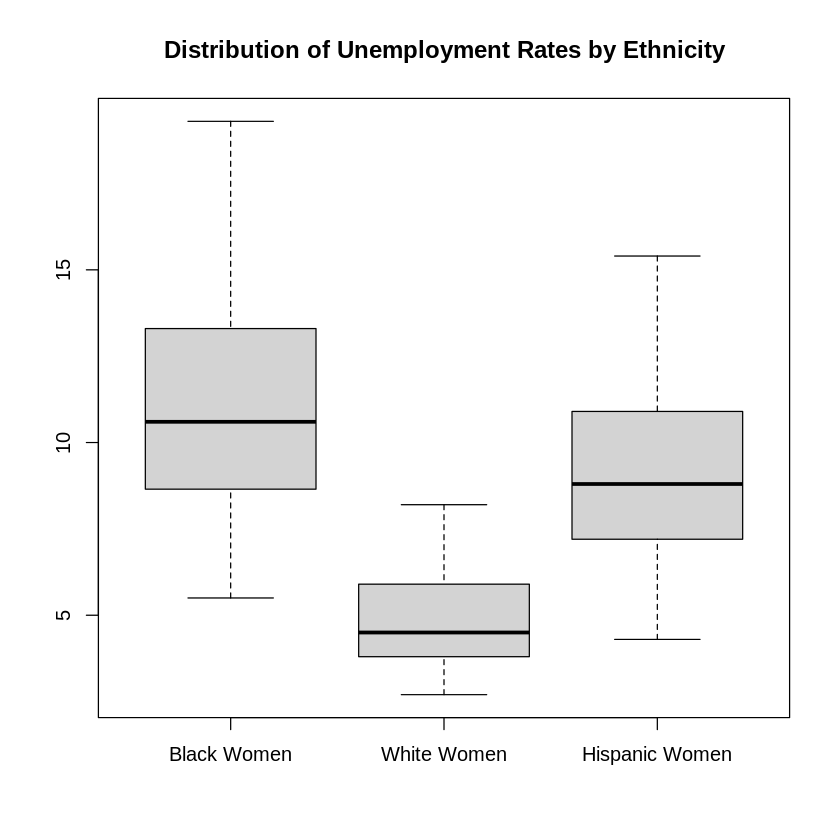

In [ ]:
black_women_quartiles <- quantile(csv$black_women, probs = c(0.25, 0.5, 0.75), na.rm = TRUE)
white_women_quartiles <- quantile(csv$white_women, probs = c(0.25, 0.5, 0.75), na.rm = TRUE)
hispanic_women_quartiles <- quantile(csv$hispanic_women, probs = c(0.25, 0.5, 0.75), na.rm = TRUE)
print('black women quartiles')
print(black_women_quartiles)
print('white women quartiles')
print(white_women_quartiles)
print('hispanic women quartiles')
print(hispanic_women_quartiles)

boxplot(csv$black_women, csv$white_women, csv$hispanic_women,
        names = c("Black Women", "White Women", "Hispanic Women"),
        main = "Distribution of Unemployment Rates by Ethnicity")

## Covariance and Correlation
**Covariance** between Black and Hispanic women’s unemployment rates fluctuate more similarly in magnitude, and it is higher than between White and Hispanic women. This suggests that Black and Hispanic are more affected by external variability, while White women experience relatively stable trends.

**Correlation** between all three groups is high, showing strong relationships (all > 0.90). This suggests that while the absolute variation (i.e. covariance) in the unemployment rates of Black and Hispanic women is more different than that of white women, the variation in the direction (i.e. correlation) is similar.

The high correlation indicates shared economic or systemic influences across all groups, though a stronger absolute variability links Black and Hispanic women.

In [ ]:
### COVARIANCE MATRIX
women_dataframe <- data.frame(Black = csv$black_women, White = csv$white_women, Latino = csv$hispanic_women)
cov_matrix <- cov(women_dataframe, use = "complete.obs")  # Gestisce i valori NA, se presenti
print(cov_matrix)
### CORRELATION MATRIX
cor_matrix <- cov2cor(cov_matrix)
print(cor_matrix)

          Black    White   Latino
Black  9.934456 3.836307 6.704197
White  3.836307 1.754640 2.835056
Latino 6.704197 2.835056 5.481758
           Black     White    Latino
Black  1.0000000 0.9188558 0.9084788
White  0.9188558 1.0000000 0.9141297
Latino 0.9084788 0.9141297 1.0000000
